In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8")

In [2]:
df = pd.read_csv("../Data/BrentOilPrices.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")
print(df.shape)
df.head()

(9011, 2)


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9011 non-null   datetime64[ns]
 1   Price   9011 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.9 KB


,Date,Price
count,9011,9011.000000
mean,2005-02-10 23:46:53.760958720,48.420782
min,1987-05-20 00:00:00,9.100000
25%,1996-03-20 12:00:00,19.050000
50%,2005-02-02 00:00:00,38.570000
75%,2014-01-09 12:00:00,70.090000
max,2022-11-14 00:00:00,143.950000
std,NaN,32.860110


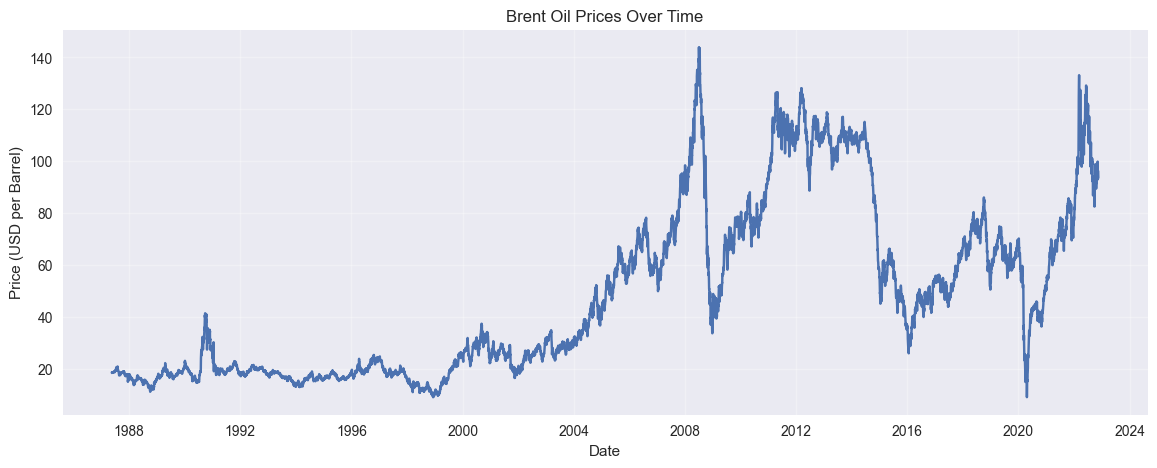

In [4]:
plt.figure(figsize=(14,5))
plt.plot(df["Date"], df["Price"])
plt.title("Brent Oil Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD per Barrel)")
plt.grid(alpha=0.3)
plt.show()

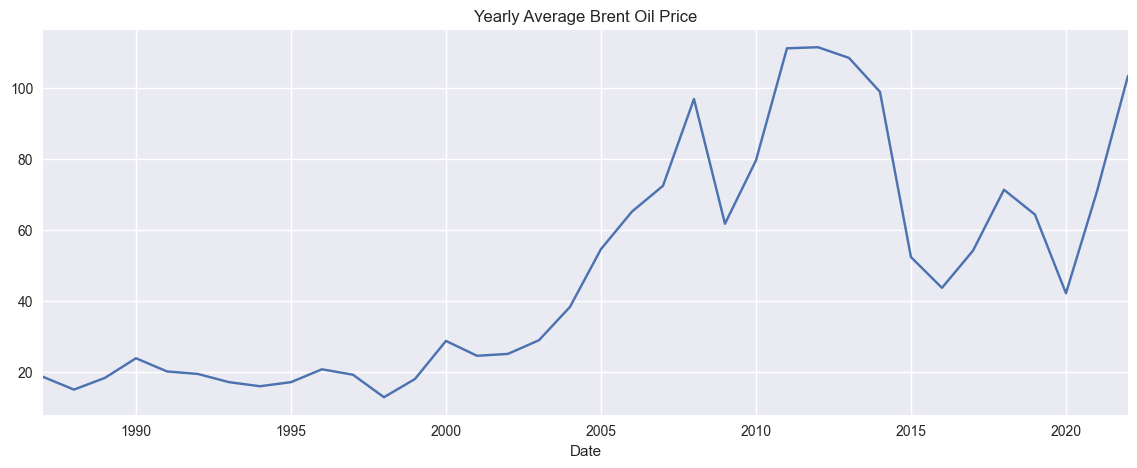

In [5]:
df.set_index("Date")["Price"].resample("Y").mean().plot(figsize=(14,5))
plt.title("Yearly Average Brent Oil Price")
plt.show()

In [6]:
df["log_price"] = np.log(df["Price"])
df["log_return"] = df["log_price"].diff()
df = df.dropna()
df.head()

,Date,Price,log_price,log_return
1,1987-05-21,18.45,2.915064,-0.009709
2,1987-05-22,18.55,2.920470,0.005405
3,1987-05-25,18.60,2.923162,0.002692
4,1987-05-26,18.63,2.924773,0.001612
5,1987-05-27,18.60,2.923162,-0.001612


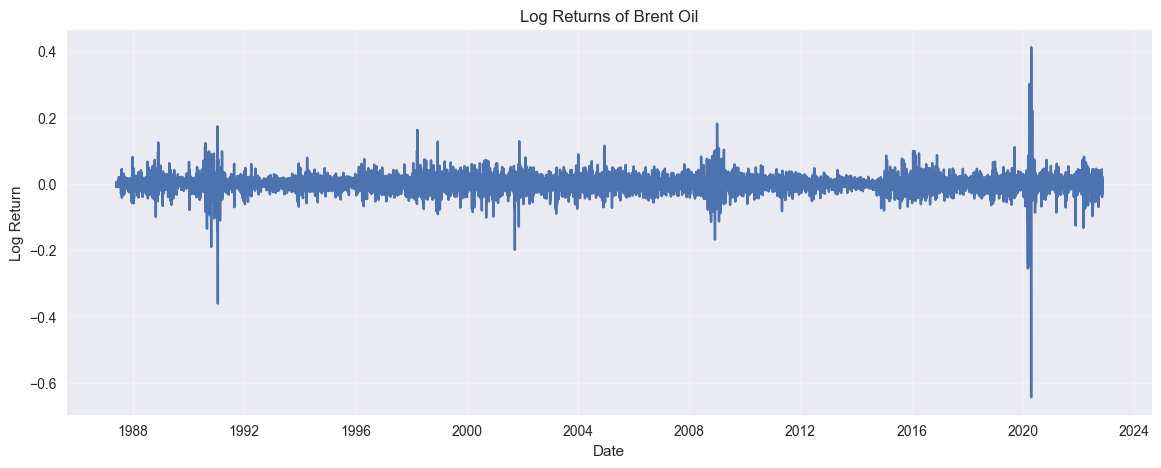

In [7]:
plt.figure(figsize=(14,5))
plt.plot(df["Date"], df["log_return"])
plt.title("Log Returns of Brent Oil")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid(alpha=0.3)
plt.show()

In [8]:
result = adfuller(df["log_return"])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -16.427113494485894
p-value: 2.4985801611428892e-29


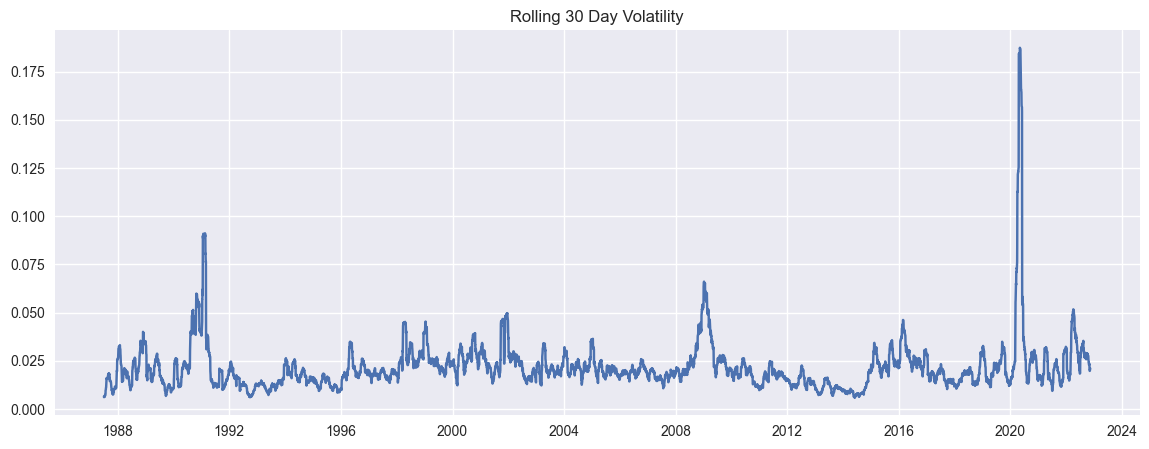

In [10]:
df["volatility"] = df["log_return"].rolling(30).std()
plt.figure(figsize=(14,5))
plt.plot(df["Date"], df["volatility"])
plt.title("Rolling 30 Day Volatility")
plt.show()